In [2]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

Возьмем датасет [отсюда](https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset).

In [3]:
df = pd.read_csv("./data/framingham.csv")

In [4]:
# посмотрим на sample датасета
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [5]:
# посмотрим на признаки и инфу о них
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
# посмотрим, есть ли пропущенные значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
df.education.isna().sum()

105

In [8]:
df = df[~df['education'].isna()]

In [9]:
df['cigsPerDay'].isna().sum()

27

In [10]:
df = df[~df['cigsPerDay'].isna()]

In [11]:
df[df['BPMeds'].isna()]['TenYearCHD'].mean()

0.20754716981132076

In [12]:
df = df[~df['BPMeds'].isna()]

In [13]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

In [14]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [15]:
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [16]:
df[~df['glucose'].isna()]['TenYearCHD'].mean()

0.15376256452051074

In [17]:
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())

In [18]:
# что будем делать с NaN-ами?
# что вообще можно с ними делать? (3 варианта)

In [19]:
# посмотрим на распределения значений признаков (и таргета)

In [20]:
# sns.pairplot(df)

In [21]:
# посмотрим на корреляцию между признаками

In [22]:
df.drop(['currentSmoker', 'diaBP'], axis=1, inplace=True)

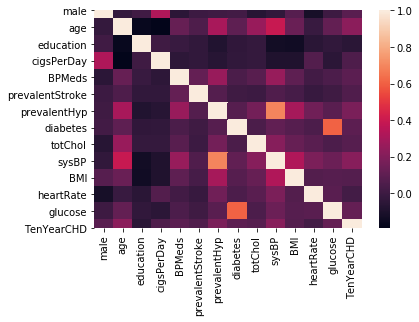

In [23]:
sns.heatmap(df.corr())

In [24]:
df.columns

Index(['male', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'BMI', 'heartRate',
       'glucose', 'TenYearCHD'],
      dtype='object')

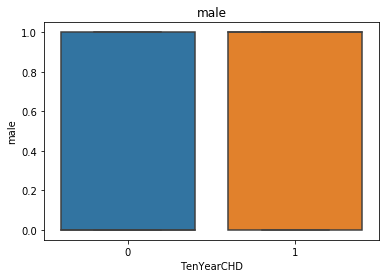

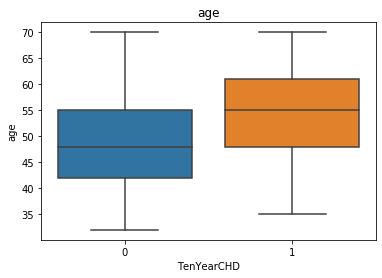

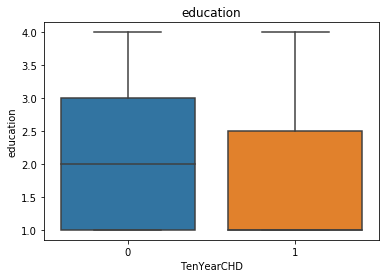

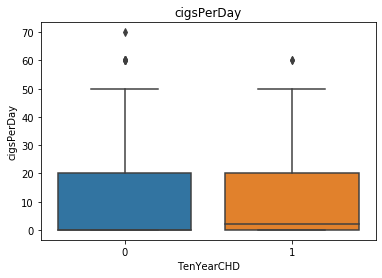

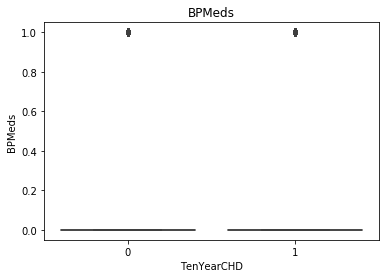

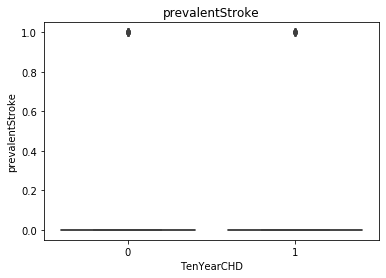

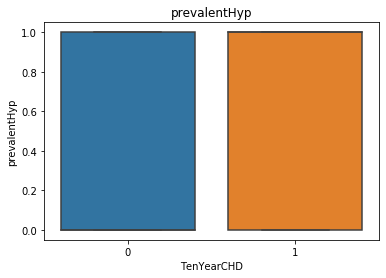

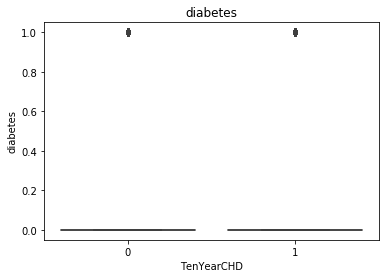

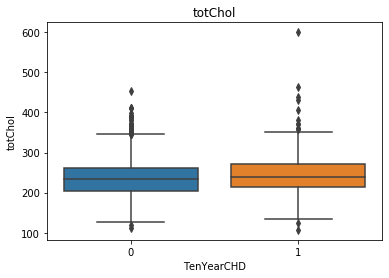

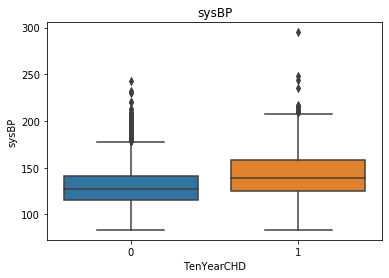

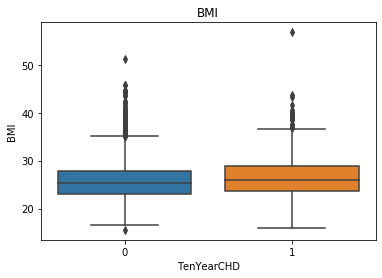

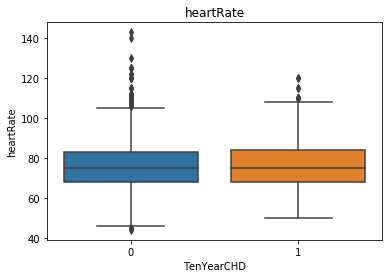

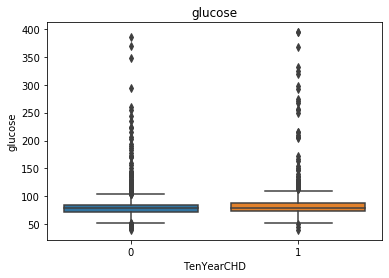

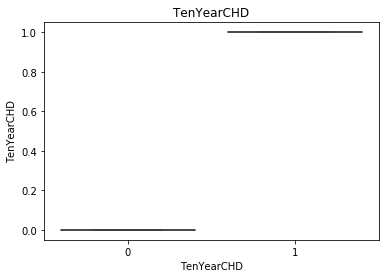

In [25]:
# что такое boxplot?
# посмотрим на него (них)
for feature in df.columns:
    plt.title(feature)
    sns.boxplot(x=df['TenYearCHD'], y=df[feature])
    plt.show()

In [26]:
# разделим данные на train и test
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
encoder = OneHotEncoder()

In [29]:
# поработаем с категориальными признаками
tmp = pd.DataFrame(encoder.fit_transform(df['education'].values.reshape(-1, 1)).todense())

for i, val in enumerate(tmp):
    pass

In [30]:
df = pd.concat([
    ,
    df.drop(['education'], axis=1)
], axis=1)

/home/rokku/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['TenYearCHD'], axis=1), df['TenYearCHD'], 
                                                    test_size=0.33, random_state=42)

In [32]:
# обучим модель
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
# оценим качество

In [ ]:
from sklearn.metrics import log_loss, roc_auc_score